In [32]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

from pathlib import Path
from itertools import chain

In [7]:
p = Path("results/batch_checkpoint")

In [12]:
samples_paths = list(p.glob("samples*"))  # get samples
seed_folders = list(p.glob("seed*")) # get simulations

In [33]:
samples_paths

[PosixPath('results/batch_checkpoint/samples-80-kw_97_extended.npy'),
 PosixPath('results/batch_checkpoint/samples-89-kw_97_extended.npy'),
 PosixPath('results/batch_checkpoint/samples-99-kw_97_extended.npy'),
 PosixPath('results/batch_checkpoint/samples-97-kw_97_extended.npy'),
 PosixPath('results/batch_checkpoint/samples-44-kw_97_extended.npy'),
 PosixPath('results/batch_checkpoint/samples-81-kw_97_extended.npy')]

In [35]:
samples_dict = {}
for samples_file in samples_paths:
    seed = samples_file.name.split("-")[1]
    samples = np.load(samples_file)
    samples_dict[seed] = samples

In [27]:
batches_dict = {}
for seed_folder in seed_folders:
    seed = seed_folder.name.split("_")[1]
    batches_files = list(seed_folder.glob("batch*"))
    batches = [pd.read_pickle(bfile) for bfile in batches_files]
    batches = list(chain.from_iterable(batches))
    batches_dict[seed] = batches

In [38]:
dfs = {}
for seed in batches_dict.keys():
    samples = samples_dict[seed]
    outcomes = batches_dict[seed]
    samples = samples[:len(outcomes), :]
    outcomes = np.array(outcomes)
    data = np.concatenate((samples, outcomes.reshape(-1, 1)), axis=1)
    dfs[seed] = data

In [49]:
data = np.concatenate(list(dfs.values()), axis=0)

## Outcome distribution

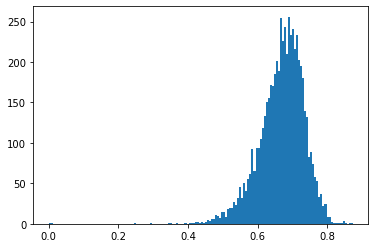

In [52]:
_ = plt.hist(data[:, -1], bins=150)

## Feature distributions

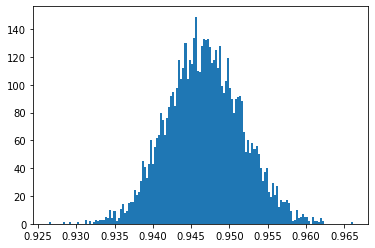

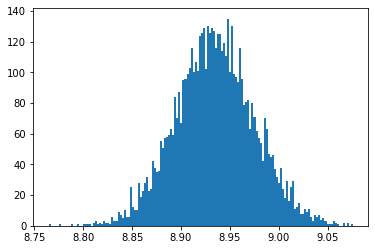

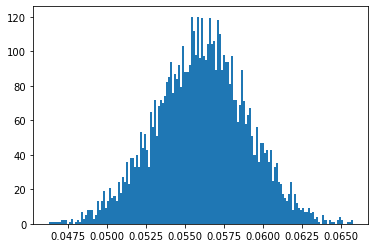

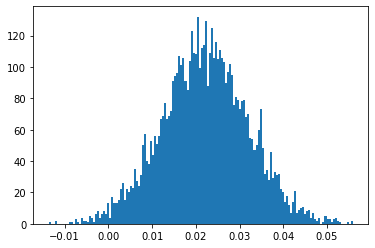

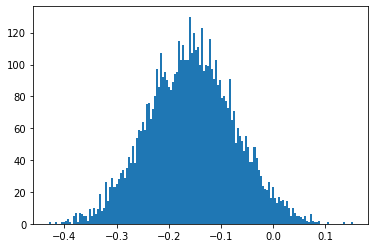

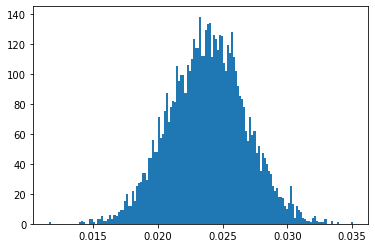

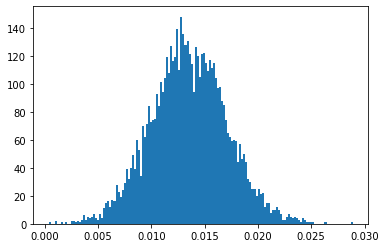

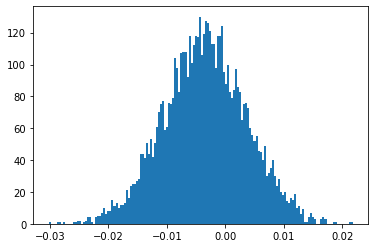

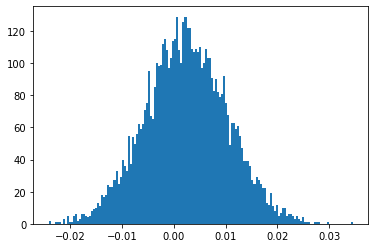

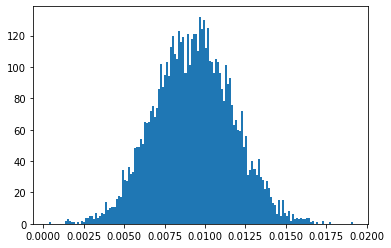

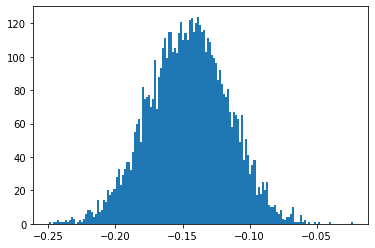

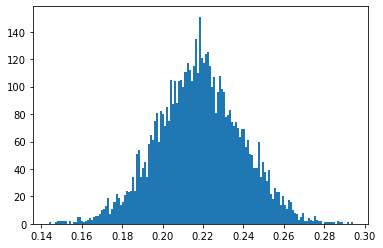

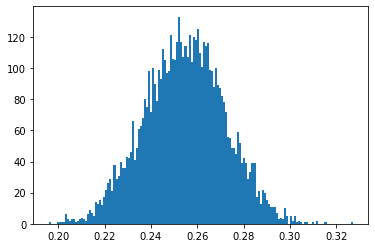

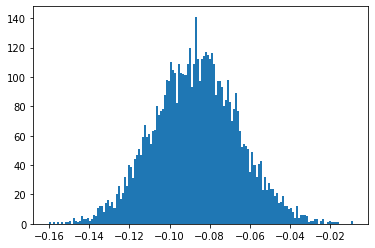

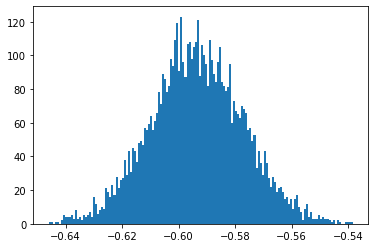

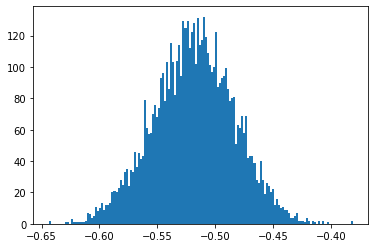

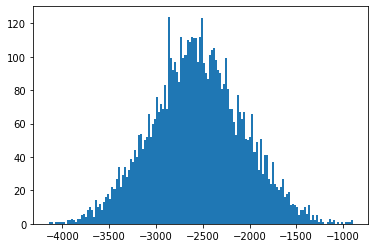

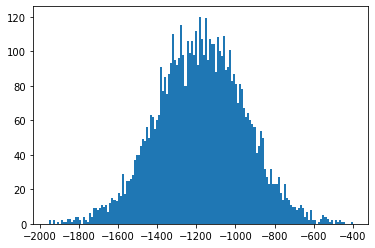

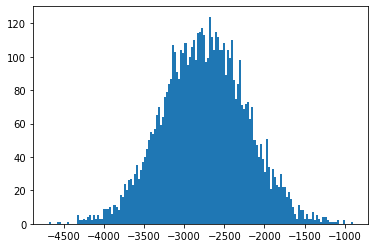

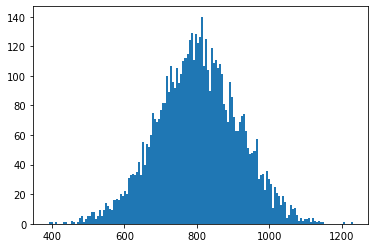

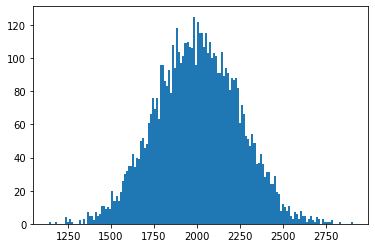

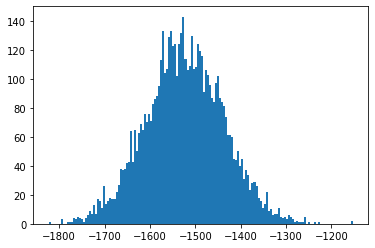

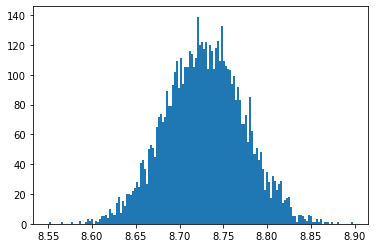

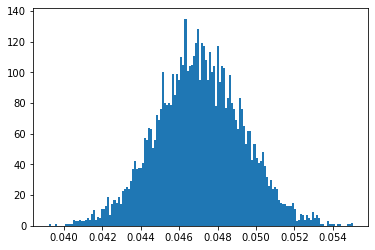

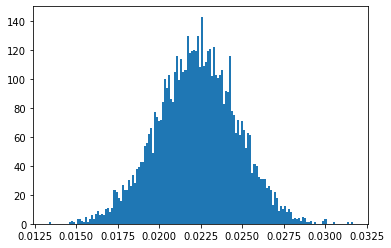

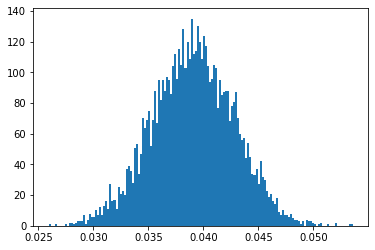

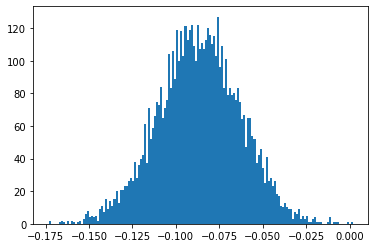

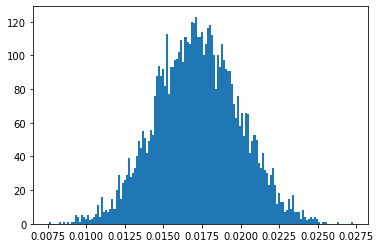

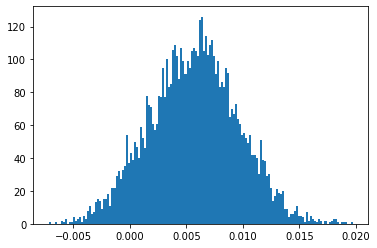

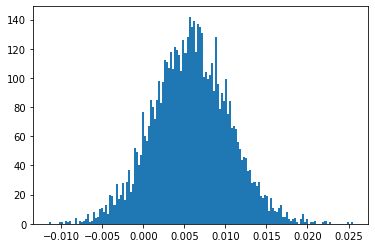

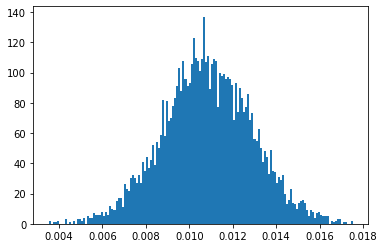

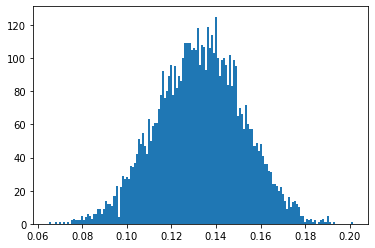

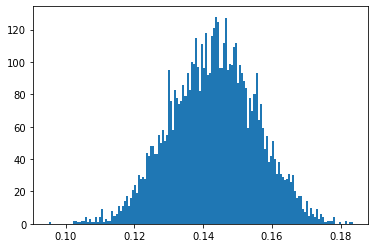

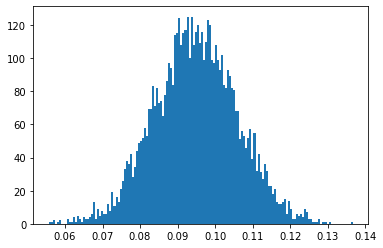

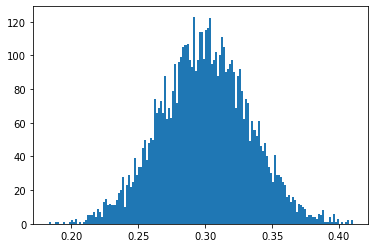

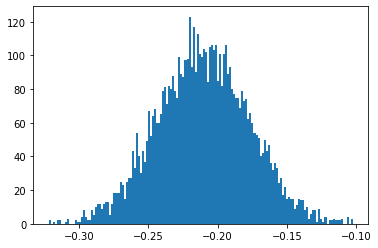

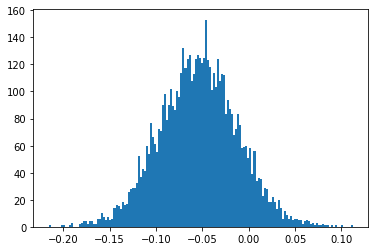

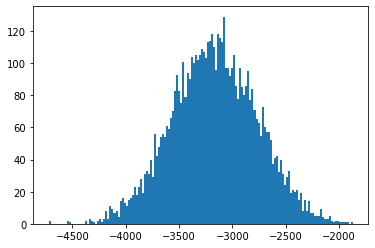

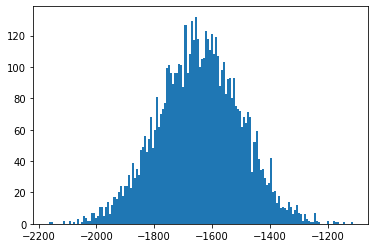

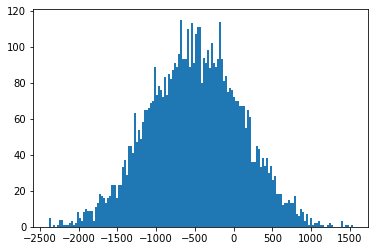

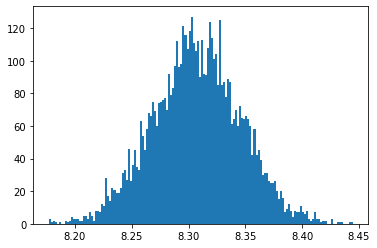

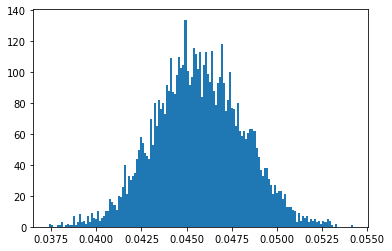

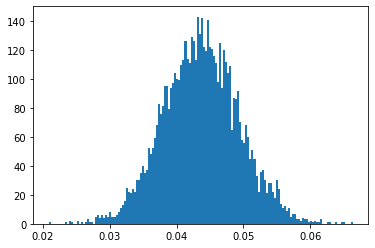

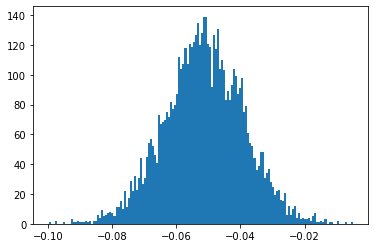

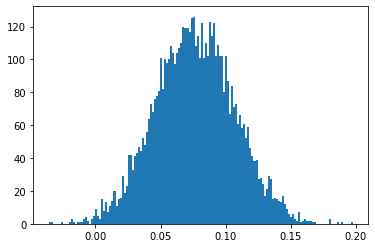

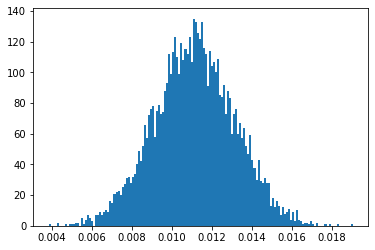

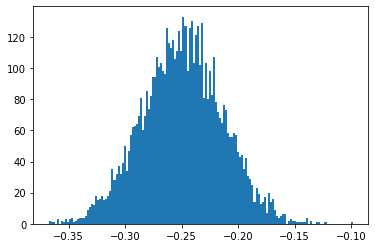

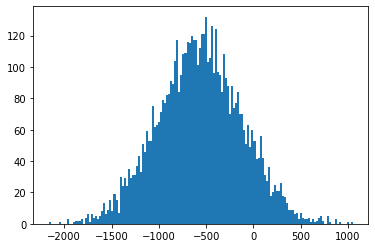

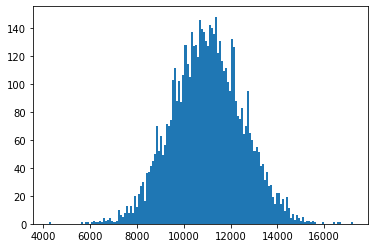

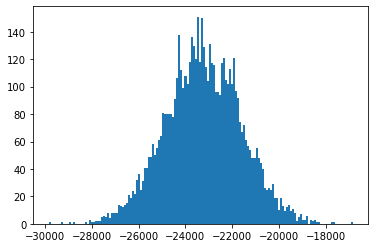

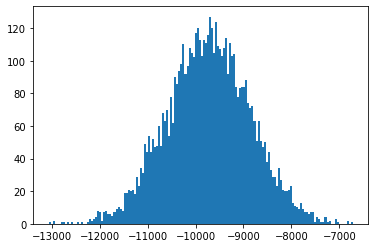

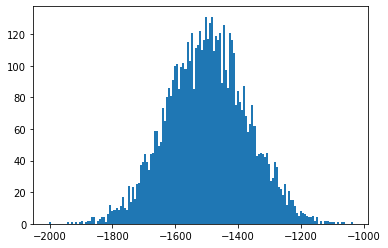

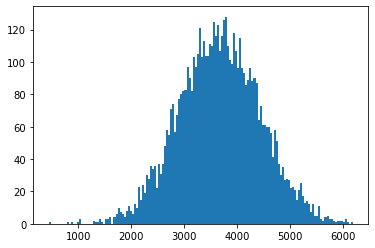

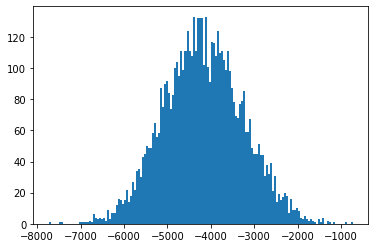

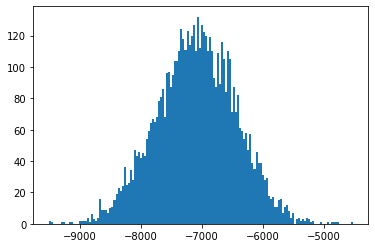

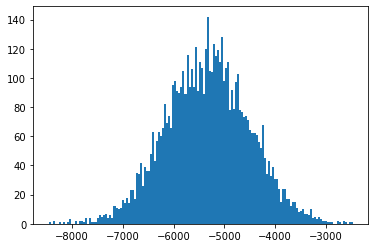

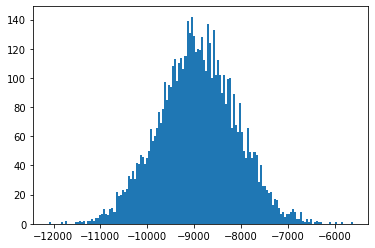

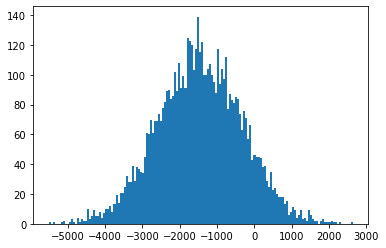

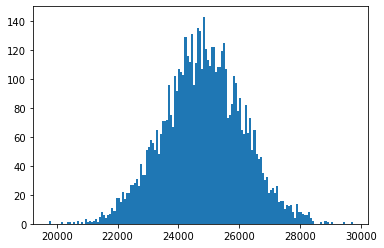

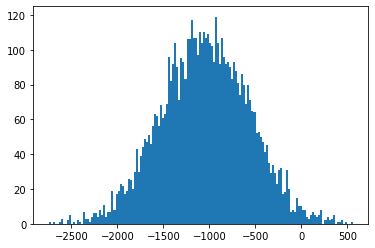

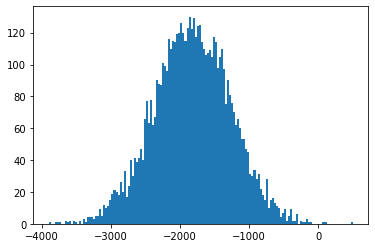

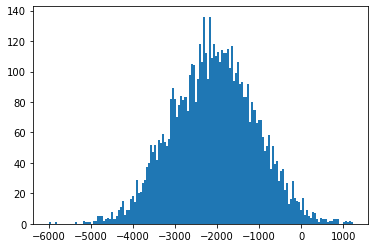

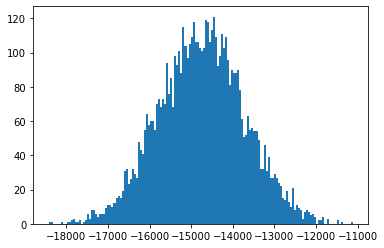

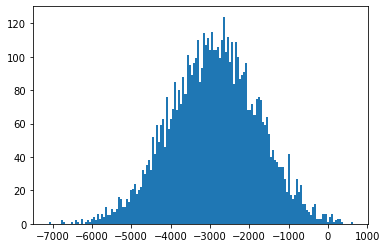

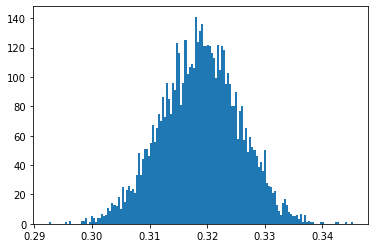

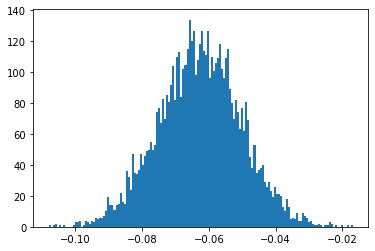

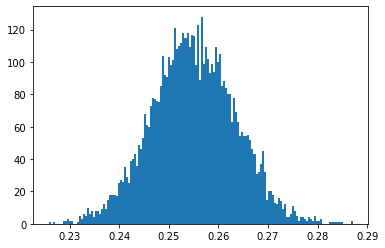

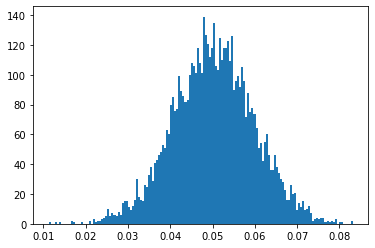

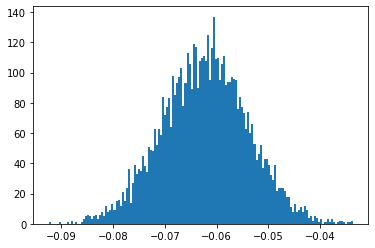

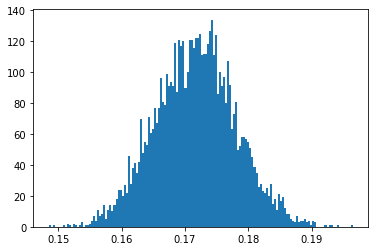

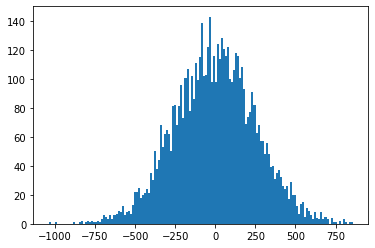

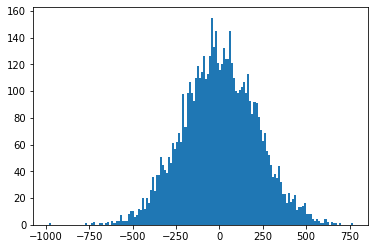

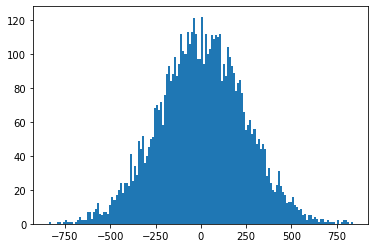

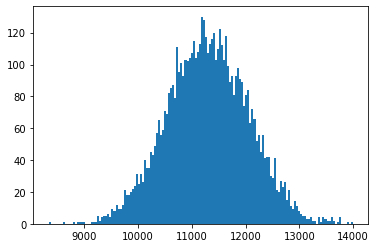

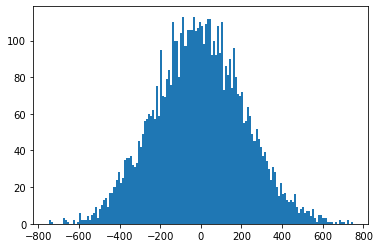

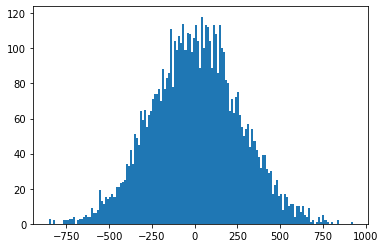

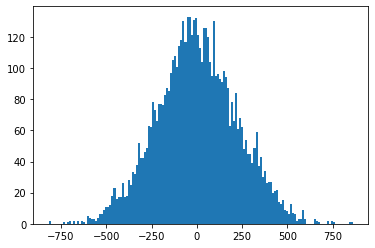

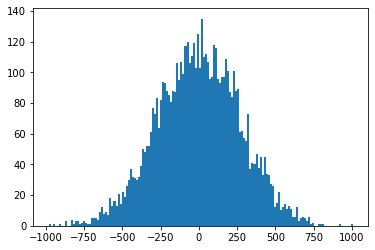

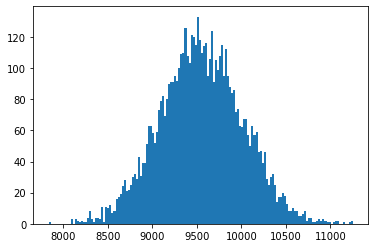

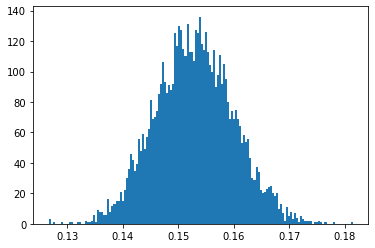

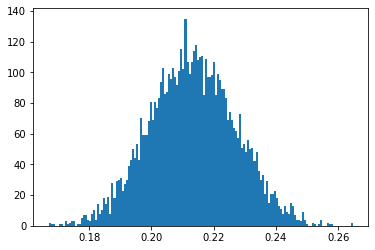

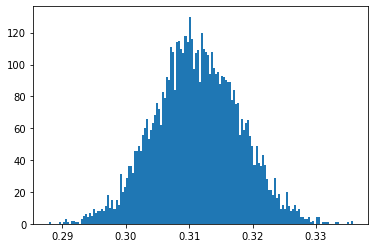

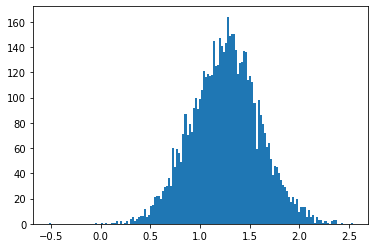

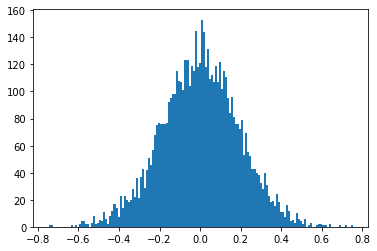

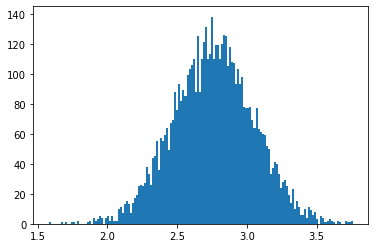

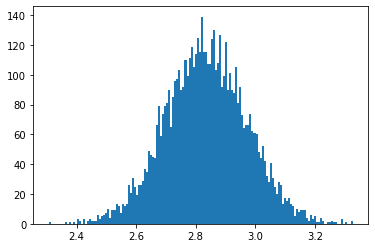

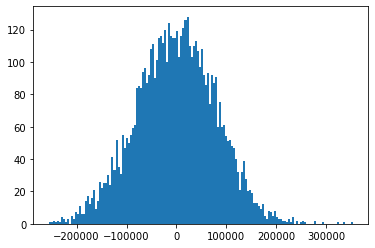

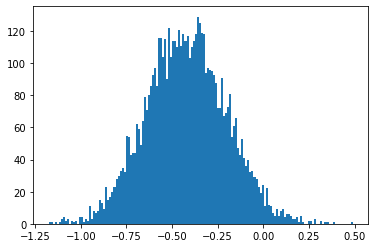

In [53]:
for col_number in range(data.shape[1] - 1):
    _ = plt.hist(data[:, col_number], bins=150)
    plt.show()